<a href="https://colab.research.google.com/github/surpha/mVQA/blob/main/divide/VQA/Connecting%20Text%20and%20Images/Implementing_CLIP_with_select_BITS_examples_SOP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pytorch torchvision torchaudio

  Using cached pytorch-1.0.2.tar.gz (689 bytes)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━

In [3]:
!pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [5]:
!pip install ftfy
!pip install regex
!pip install tqdm
!pip install numpy
!pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 1.7 MB/s eta 0:00:00


In [20]:
!pip install git+https://github.com/openai/CLIP.git


  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-njt1udqi
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-njt1udqi
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369499 sha256=5ace880cd92671c4c7ac452a8c55c8eeeaccaed910d4f54c40bc98d2f601d708
  Stored in directory: /tmp/pip-ephem-wheel-cache-pw4ej_w8/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip


In [18]:
!cd /content

In [16]:
%ls

CLIP/  sample_data/


In [21]:
import torch
import clip
from PIL import Image
import numpy as np
import cv2

In [22]:
device = "cuda" if torch.cuda.is_available() else "cpu"


In [23]:
model , preprocess = clip.load("ViT-B/32", device = device)

100%|███████████████████████████████████████| 338M/338M [00:06<00:00, 57.8MiB/s]


In [24]:
%ls

CLIP/  sample_data/


In [25]:
%cd /content/CLIP

/content/CLIP


In [26]:
%ls

BITSCampusGate.jpg    CLIP.png    LICENSE        notebooks/        setup.py
BITS_CLockTower.jpeg  data/       MANIFEST.in    README.md         tests/
clip/                 hubconf.py  model-card.md  requirements.txt  WomanSpeakingBITS.jpg


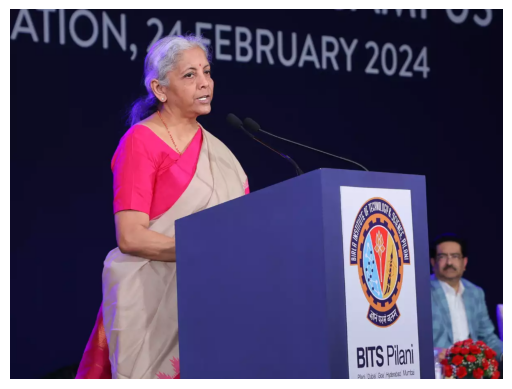

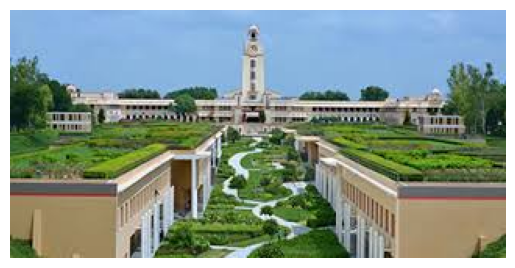

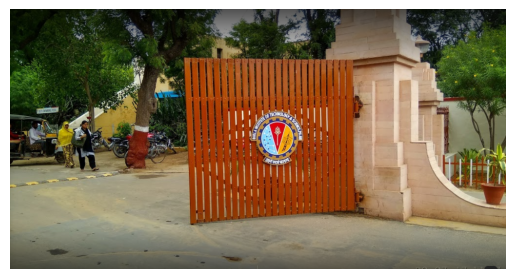

In [29]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Directory containing the images
directory = "/content/CLIP"

# List all files in the directory
files = os.listdir(directory)

# Filter files with ".jpg" and ".jpeg" extensions
jpeg_files = [file for file in files if file.endswith((".jpg", ".jpeg"))]

# Print the list of JPEG images and display them
for jpeg_file in jpeg_files:
    image_path = os.path.join(directory, jpeg_file)
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis('off')  # Turn off axis
    plt.show()


In [30]:
textLabels = ["Woman speaking in a mic on the podium" , "Clock Tower and Greenery", "Campus gate with BITS logo"]

In [31]:
testImagePath = "/content/CLIP/WomanSpeakingBITS.jpg"
image = preprocess(Image.open(testImagePath)).unsqueeze(0).to(device)

In [32]:
text = clip.tokenize(textLabels).to(device)

In [33]:
with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)

    logits_per_image , logits_per_text = model(image,text)

    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

print(probs)

[[9.908742e-01 4.467175e-06 9.121338e-03]]


In [34]:
probs = probs[0]
answer = np.argmax(probs)
text = textLabels[answer]

print ('Predicted : ' + text)

Predicted : Woman speaking in a mic on the podium


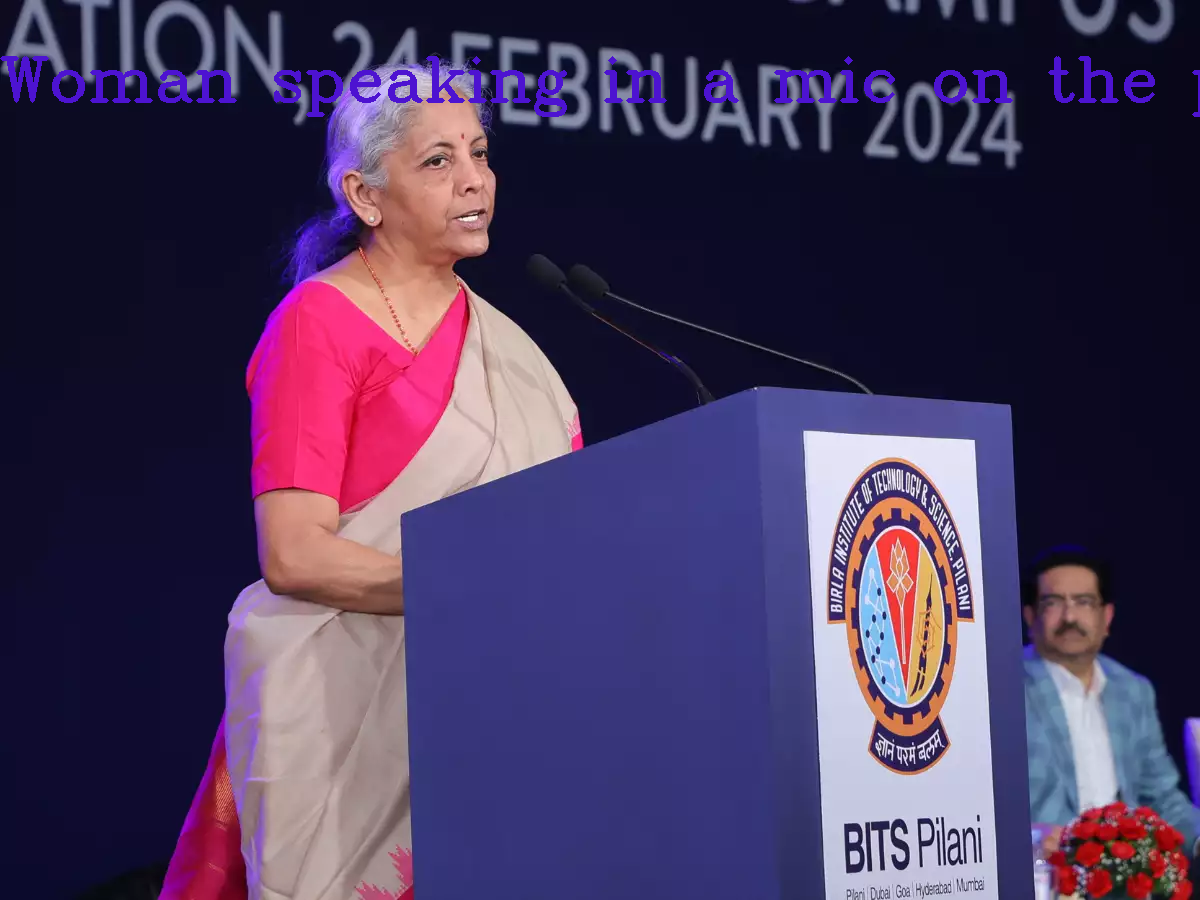

In [36]:
from google.colab.patches import cv2_imshow
import cv2

img = cv2.imread(testImagePath)
font = cv2.FONT_HERSHEY_COMPLEX

cv2.putText(img, text, (0, 100), font, 2, (209, 19, 77), 3)

cv2_imshow(img)


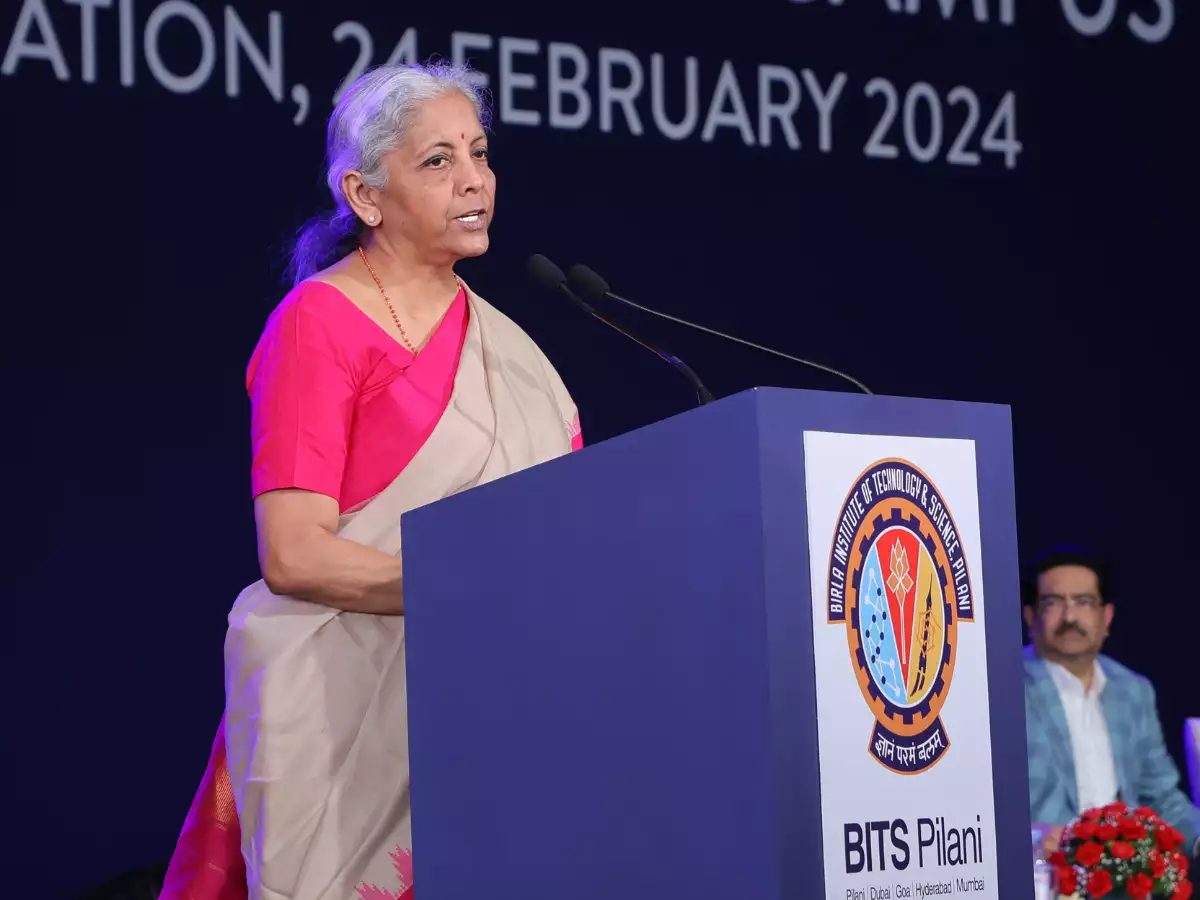

Predicted Caption: Woman speaking in a mic on the podium


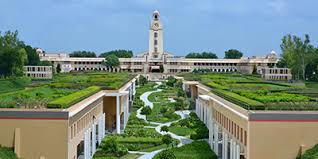

Predicted Caption: Clock Tower and Greenery


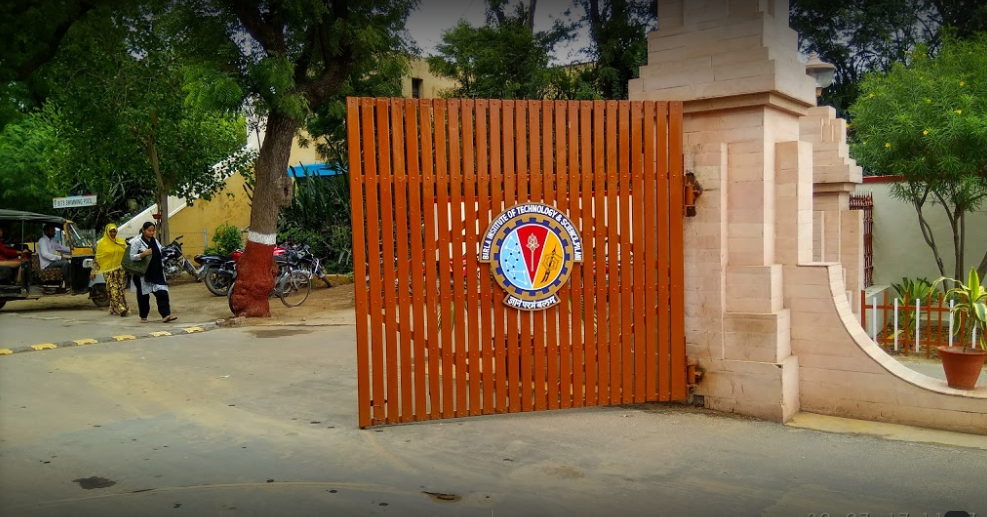

Predicted Caption: Campus gate with BITS logo


In [38]:
# Function to predict and return caption for an image
def predict_caption(image_path):
    # Load and preprocess the image
    image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)

    # Tokenize the text labels
    text = clip.tokenize(textLabels).to(device)

    # Perform inference
    with torch.no_grad():
        image_features = model.encode_image(image)
        text_features = model.encode_text(text)
        logits_per_image, logits_per_text = model(image, text)
        probs = logits_per_image.softmax(dim=-1).cpu().numpy()

    # Get the predicted caption
    probs = probs[0]
    answer = np.argmax(probs)
    predicted_caption = textLabels[answer]

    return predicted_caption

# Iterate over all JPG and JPEG images in the directory
directory = "/content/CLIP"
for filename in os.listdir(directory):
    if filename.endswith(".jpg") or filename.endswith(".jpeg"):
        image_path = os.path.join(directory, filename)
        predicted_caption = predict_caption(image_path)

        # Display image
        img = cv2.imread(image_path)
        cv2_imshow(img)

        # Display predicted caption
        print("Predicted Caption:", predicted_caption)
